<a href="https://colab.research.google.com/github/Lucasa98/PDS-2024/blob/main/Guia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1 y 2
- Determinar la función de transferencia H(z) de los sistemas LTI del Ej 1 aplicando la transformada Z y su propiedad de desplazamiento en el tiempo
- Encontrar la respuesta en frecuencia de los sistemas, con fm=10kHz, teniendo en cuenta la relación entre la transformada Z y la Transformada de Fourier

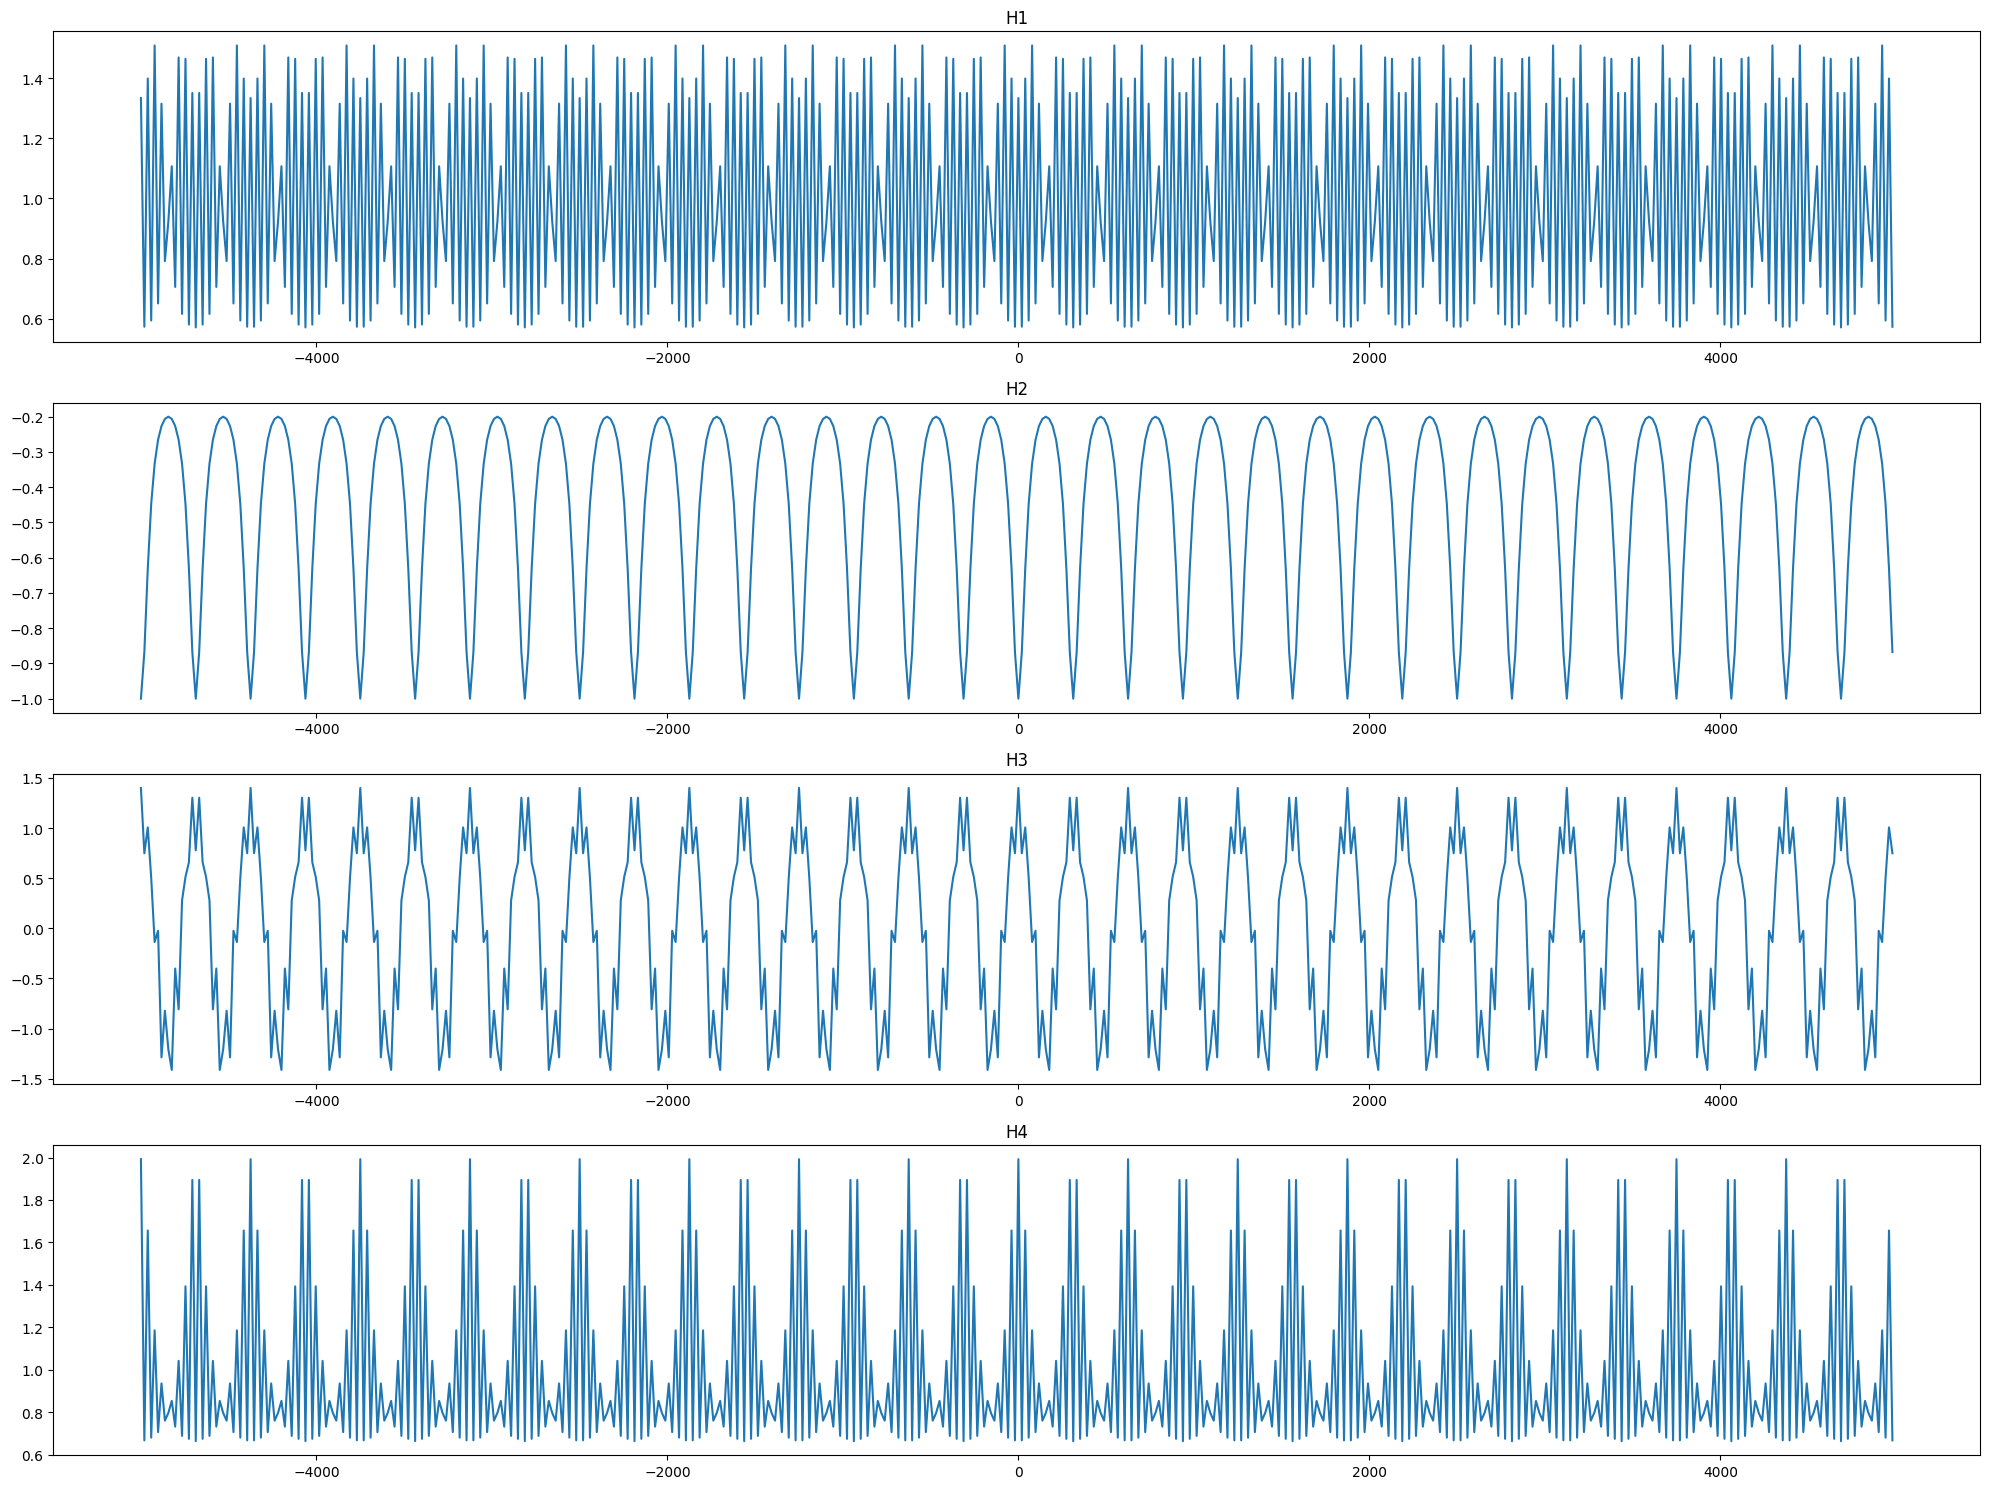

In [ ]:
# La respuesta en frecuencia es la TDF de la respuesta al impulso h del sistema.
# Si hacemos la transformada Z de h con r=1 y a intervalos regulares de w (omega),
# esta transformada, que ya tenemos (funcion de transferencia H(z)) va a ser
# igual a la TDF de h

fm = 10000                    # me dara el intervalo de frecuencias
N = 512                       # muestras en frecuencia
T = fm/N                      # periodo de muestreo de la frecuencia
f = np.arange(-fm/2,fm/2,T)

# omegas para generar las z's
w = 2*np.pi*f
z = np.exp(1j*w)

# Respuestas en frecuencia
H1 = [0]*N
H2 = [0]*N
H3 = [0]*N
H4 = [1]*N  # el primer termino de la sumatoria es siempre 1

for n in range(N):
  H1[n] = 1/(1 - 1/(2*z[n]) + 1/(4*(z[n]**2)))
  H2[n] = 1/(z[n] * (1 - 1/z[n] - 1/z[n]**2))
  H3[n] = 7/(1 - 2/z[n] + 6/(z[n]**2))
  for k in range(1,8):  # me salteo el primer termino (ver comentario anterior)
    H4[n] += 1/(2*z[n])**k

# --------------------------------- PLOT ---------------------------------
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
plt.plot(f,H1)
plt.title("H1")

plt.subplot(4,1,2)
plt.plot(f,H2)
plt.title("H2")

plt.subplot(4,1,3)
plt.plot(f,H3)
plt.title("H3")

plt.subplot(4,1,4)
plt.plot(f,H4)
plt.title("H4")

plt.tight_layout()
plt.show()


# Ejercicio 3
Ver el sistema de la consigna.

- Dibujar el diagrama de polos y ceros. ¿Es estable el sistema?

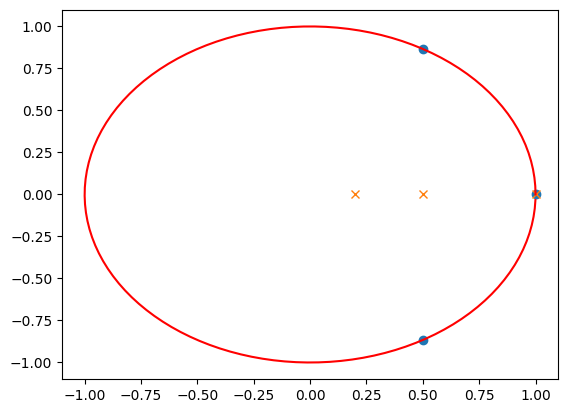

In [ ]:
# ceros y polos calculados con symbolab
# ceros
# (1 + j0), (0.5 + jsqrt(3)/2), (0.5 - jsqrt(3)/2)
plt.plot([1,0.5,0.5],[0,np.sqrt(3)/2,-np.sqrt(3)/2],'o')

# polos
# (1 + j0), (0.5 + j0), (0.2 + j0)
plt.plot([1,0.5,0.2],[0,0,0],'x')

# circulo
t = np.arange(0,2*np.pi,0.05)
plt.plot(np.cos(t),np.sin(t),'r')

plt.show()

- Determinar respuesta al impulso del sistema

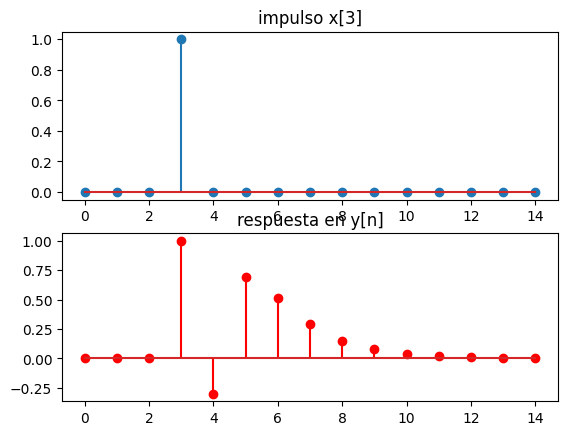

In [ ]:
# H(z) = Y(z)/X(z)
# haciendolo en papel...
# y[n] = x[n] - 2x[n-1] + 2x[n-2] - x[n-3] + 1.7y[n-1] - 0.8y[n-2] + 0.1y[n-3]

x = [0]*15
x[3] = 1
y = [0]*15
for n in range(3,15):
  y[n] = x[n] - 2*x[n-1] + 2*x[n-2] - x[n-3] + 1.7*y[n-1] - 0.8*y[n-2] + 0.1*y[n-3]

plt.subplot(2,1,1)
plt.stem(x)
plt.title("impulso x[3]")

plt.subplot(2,1,2)
plt.stem(y,'r')
plt.title("respuesta en y[n]")

plt.show()

# Ejercicio 4

Considere el sistema continuo H(s) (ver en consigna)
- Obtenga la función de transferencia H(z) del sistema discreto correspondiente mediante transformaciones conformes de Euler y Bilineal

In [ ]:
# Respuesta en frecuencia continua H(s)
N = 4096          # numero de muestras
w = np.arange(0,N)
f = w/(2*np.pi)

H = [0]*N
for n in range(N):
  H[n] = 12500*(1j*w[n])/(-44*(w[n]**2) + 60625*(1j*w[n]) + 6250000)

plt.plot(f,H)
plt.show()

- Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3 dB respecto al máximo) y utilice una frecuencia de muestre cuatro veces superior para aplicar las transformaciones conforme

In [ ]:
# Buscar frecuencia de corte
H_abs = np.abs(H)
f_max = max(H_abs)
i_max = 0
for n in range(N):
  if(H_abs[n] == f_max):
    i_max = n
    break

i_corte = 0
for n in range(i_max,N):
  if(np.abs(H[n]) <= f_max/2):
    i_corte = n
    break

print("frecuencia de corte: ",f[i_corte]) # ~389

# Transformación conforme
fm = round(f[i_corte]*4)
print("Frecuencia de muestreo: ", fm)     # 1557
T = 1/fm
print("Periodo de muestreo: ",T)


In [ ]:
# Euler
# s = (1-z^-1)/T
def Tconf_Euler (z,T):
  N = len(z)
  Hs = [0]*N
  for n in range(N):
    s = (1 - 1/z[n])/T
    Hs[n] = 12500*(s)/(44*(s**2) + 60625*(s) + 6250000)
  return Hs

# Bilineal
# s = 2*((1-z^-1)/(1+z^-1))/T
def Tconf_Bilineal (z,T):
  N = len(z)
  Hs = [0]*N
  C1 = 2/T
  for n in range(N):
    s = C1*((1 - 1/z[n])/(1 + 1/z[n]))
    Hs[n] = 12500*(s)/(44*(s**2) + 60625*(s) + 6250000)
  return Hs

- Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y compárelas con la del continuo.
- Determine si la frecuencia de muestreo utilizada permite obtener la respuesta esperada mediante ambas transformaciones. Es decir... que sea parecida

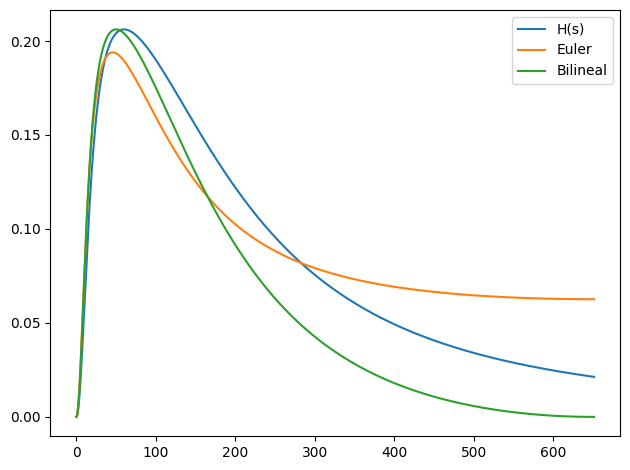

In [ ]:
# Respuestas en frecuencia discretas
w_z = np.arange(0,np.pi,np.pi/N)
z = np.exp(1j*w_z)
Hz_Euler = Tconf_Euler(z,T)
Hz_Bilineal = Tconf_Bilineal(z,T)

plt.plot(f,H,label="H(s)")

plt.plot(f,Hz_Euler,label="Euler")

plt.plot(f,Hz_Bilineal,label="Bilineal")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Respuestas en frecuencia discretas
Hz_Euler = Tconf_Euler(z,T/4)
Hz_Bilineal = Tconf_Bilineal(z,T/4)

plt.plot(f,H,label="H(s)")

plt.plot(f,Hz_Euler,label="Euler")

plt.plot(f,Hz_Bilineal,label="Bilineal")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Respuestas en frecuencia discretas
Hz_Euler = Tconf_Euler(z,4*T)
Hz_Bilineal = Tconf_Bilineal(z,4*T)

plt.plot(f,H,label="H(s)")

plt.plot(f,Hz_Euler,label="Euler")

plt.plot(f,Hz_Bilineal,label="Bilineal")
plt.legend()

plt.tight_layout()
plt.show()